<a href="https://colab.research.google.com/github/eduzegarra/grade_01/blob/main/papa_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/sample_data/df_base2.xlsx')

Nos quedamos solamente con papa blanca

In [3]:
dt=data[data.variedad=='Papa Blanca']

In [ ]:
dt

Normalizamos las variables continuas ´precio', 'año' y 'volumen'

In [ ]:
dt['p_norm']=(dt.precio-dt.precio.min())/(dt.precio.max()-dt.precio.min())
dt['v_norm']=(dt.volumen-dt.volumen.min())/(dt.volumen.max()-dt.volumen.min())
dt['yr_norm']=(data.year-data.year.min())/(data.year.max()-data.year.min())

In [ ]:
plt.hist(dt.v_norm)

In [12]:
import statsmodels.formula.api as smf

In [13]:
model = smf.ols(formula="p_norm ~ v_norm + yr_norm + C(mes) + C(provincia)", data=dt)

In [15]:
resultado=model.fit()

In [16]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 p_norm   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     38.45
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.45e-204
Time:                        00:01:22   Log-Likelihood:                 2496.0
No. Observations:                4838   AIC:                            -4928.
Df Residuals:                    4806   BIC:                            -4720.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1203      0.012     10.140      0.000       0.097       0.144
C(mes)[T.m_02]                   0.0099      0.010      0.983      0.326      -0.010       0.030
C(mes)[T.m_03]                  -0.0071      0.010     -0.692      0.489      -0.027       0.013
C(mes)[T.m_04]                  -0.0323      0.010     -3.090      0.002      -0.053      -0.012
C(mes)[T.m_05]                  -0.0432      0.010     -4.141      0.000      -0.064      -0.023
C(mes)[T.m_06]                  -0.0249      0.010     -2.380      0.017      -0.045      -0.004
C(mes)[T.m_07]                   0.0073      0.010      0.729      0.466      -0.012       0.027
C(mes)[T.m_08]                   0.0175      0.010      1.765      0.078      -0.002       0.037
C(mes)[T.m_09]                   0.0353      0.010      3.540      0.000       0.016       0.055
C(mes)[T.m_10]                   0.0184      0.010      1.866      0.062      -0.001       0.038
C(mes)[T.m_11]                   0.0003      0.010      0.033      0.974      -0.019       0.020
C(mes)[T.m_12]                   0.0018      0.010      0.176      0.861      -0.018       0.022
C(provincia)[T.Andahuaylas]      0.0022      0.013      0.174      0.862      -0.022       0.027
C(provincia)[T.Arequipa]         0.0054      0.013      0.431      0.666      -0.019       0.030
C(provincia)[T.Barranca]         0.0068      0.013      0.510      0.610      -0.019       0.033
C(provincia)[T.Canete]           0.0046      0.013      0.358      0.720      -0.021       0.030
C(provincia)[T.Huamanga]         0.0147      0.013      1.142      0.254      -0.011       0.040
C(provincia)[T.Huancavelica]     0.0022      0.012      0.174      0.862      -0.022       0.027
C(provincia)[T.Huancayo]         0.0146      0.013      1.151      0.250      -0.010       0.039
C(provincia)[T.Huanuco]          0.0209      0.013      1.593      0.111      -0.005       0.047
C(provincia)[T.Huaral]           0.0098      0.013      0.750      0.453      -0.016       0.036
C(provincia)[T.Huaura]           0.0078      0.014      0.578      0.564      -0.019       0.034
C(provincia)[T.Ica]              0.0066      0.014      0.461      0.645      -0.022       0.035
C(provincia)[T.Jauja]            0.0099      0.013      0.789      0.430      -0.015       0.034
C(provincia)[T.Junin]           -0.0019      0.013     -0.155      0.877      -0.026       0.023
C(provincia)[T.Lima]            -0.0006      0.013     -0.043      0.966      -0.026       0.025
C(provincia)[T.Nazca]            0.0047      0.015      0.305      0.760      -0.026       0.035
C(provincia)[T.Pasco]            0.0060      0.012      0.483      0.629      -0.018       0.030
C(provincia)[T.Tarma]            0.0078      0.012      0.628      0.530    

<ipython-input-17-6381b76b5504>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['yy_hat']=resultado.fittedvalues


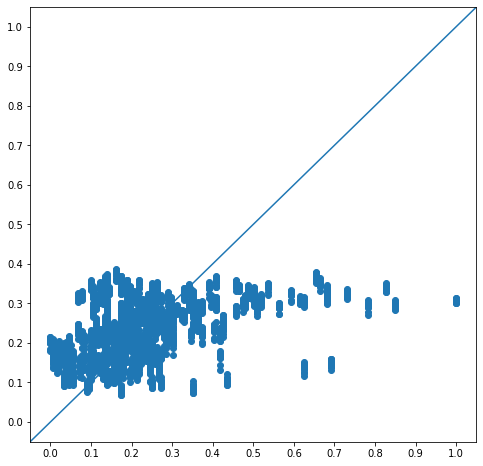

In [17]:
dt['yy_hat']=resultado.fittedvalues

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
plt.axline([0, 0], [1, 1])
plt.scatter(dt.p_norm,dt.yy_hat)
ll=np.arange(0,1.1,.1)
plt.xticks(ticks=ll)
plt.yticks(ticks=ll)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

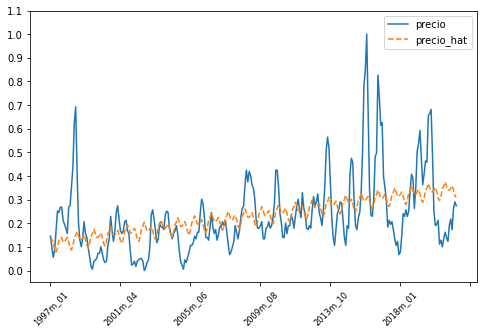

In [18]:
plt.figure(figsize=(8,5))
dt.groupby('ym')['p_norm'].mean().plot(label='precio')
dt.groupby('ym')['yy_hat'].mean().plot(label='precio_hat', linestyle='--')
plt.xticks(rotation=45, fontsize='small')
plt.yticks(np.arange(0,1.2,.1))
plt.xlabel('')
plt.legend()
plt.show

Segunda forma de estimar modelo de regresión lineal

In [19]:
dt_dum = pd.get_dummies(dt[['v_norm','yr_norm','mes','provincia']])
dt_dum.shape
dt_dum.columns

Index(['v_norm', 'yr_norm', 'mes_m_01', 'mes_m_02', 'mes_m_03', 'mes_m_04',
       'mes_m_05', 'mes_m_06', 'mes_m_07', 'mes_m_08', 'mes_m_09', 'mes_m_10',
       'mes_m_11', 'mes_m_12', 'provincia_Ambo', 'provincia_Andahuaylas',
       'provincia_Arequipa', 'provincia_Barranca', 'provincia_Canete',
       'provincia_Huamanga', 'provincia_Huancavelica', 'provincia_Huancayo',
       'provincia_Huanuco', 'provincia_Huaral', 'provincia_Huaura',
       'provincia_Ica', 'provincia_Jauja', 'provincia_Junin', 'provincia_Lima',
       'provincia_Nazca', 'provincia_Pasco', 'provincia_Tarma',
       'provincia_Tayacaja'],
      dtype='object')

In [20]:
dt_dum.drop(['mes_m_01','provincia_Ambo'], axis=1, inplace=True)


In [21]:
X = np.array(dt_dum)
XX=pd.DataFrame(X)
y = np.array(dt.p_norm).reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)
y_hat = lm.predict(X)
y_hat.shape

lm.coef_.reshape(-1,1).shape, XX.columns.shape
coefs = pd.DataFrame()
coefs['lab'] = dt_dum.columns
coefs['coef'] = lm.coef_.reshape(-1,1)
coefs    

,lab,coef
0,v_norm,-0.066967
1,yr_norm,0.230552
2,mes_m_02,0.009900
3,mes_m_03,-0.007097
4,mes_m_04,-0.032289
5,mes_m_05,-0.043180
6,mes_m_06,-0.024947
7,mes_m_07,0.007323
8,mes_m_08,0.017514
9,mes_m_09,0.035329


In [23]:
resultado.params

Intercept                       0.120251
C(mes)[T.m_02]                  0.009900
C(mes)[T.m_03]                 -0.007097
C(mes)[T.m_04]                 -0.032289
C(mes)[T.m_05]                 -0.043180
C(mes)[T.m_06]                 -0.024947
C(mes)[T.m_07]                  0.007323
C(mes)[T.m_08]                  0.017514
C(mes)[T.m_09]                  0.035329
C(mes)[T.m_10]                  0.018418
C(mes)[T.m_11]                  0.000331
C(mes)[T.m_12]                  0.001811
C(provincia)[T.Andahuaylas]     0.002187
C(provincia)[T.Arequipa]        0.005407
C(provincia)[T.Barranca]        0.006818
C(provincia)[T.Canete]          0.004599
C(provincia)[T.Huamanga]        0.014724
C(provincia)[T.Huancavelica]    0.002163
C(provincia)[T.Huancayo]        0.014592
C(provincia)[T.Huanuco]         0.020863
C(provincia)[T.Huaral]          0.009835
C(provincia)[T.Huaura]          0.007818
C(provincia)[T.Ica]             0.006631
C(provincia)[T.Jauja]           0.009874
C(provincia)[T.J

In [ ]:
coefs